Metadata:
Image ImageWidth: 2250
Image ImageLength: 4000
Image ImageDescription: 
Image Make: realme
Image Model: narzo 50 5G
Image Orientation: Horizontal (normal)
Image XResolution: 72
Image YResolution: 72
Image ResolutionUnit: Pixels/Inch
Image Software: MediaTek Camera Application
Image DateTime: 2024:07:08 18:58:22
Image YCbCrPositioning: Co-sited
Image Tag 0x0220: 0
Image Tag 0x0221: 0
Image Tag 0x0222: 0
Image Tag 0x0223: 0
Image Tag 0x0224: 0
Image Tag 0x0225: 
Image ExifOffset: 438
Thumbnail Compression: JPEG (old-style)
Thumbnail Orientation: Horizontal (normal)
Thumbnail XResolution: 72
Thumbnail YResolution: 72
Thumbnail ResolutionUnit: Pixels/Inch
Thumbnail JPEGInterchangeFormat: 2036
Thumbnail JPEGInterchangeFormatLength: 0
Thumbnail YCbCrPositioning: Co-sited
EXIF ExposureTime: 9997/1000000
EXIF FNumber: 179/100
EXIF ExposureProgram: Unidentified
EXIF ISOSpeedRatings: 100
EXIF SensitivityType: Unknown
EXIF RecommendedExposureIndex: 0
EXIF ExifVersion: 0220
EXIF DateTime

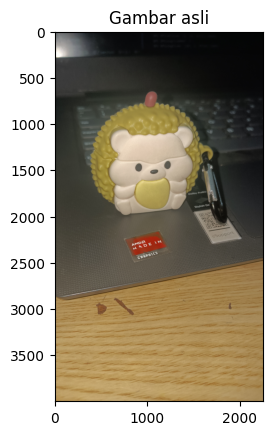

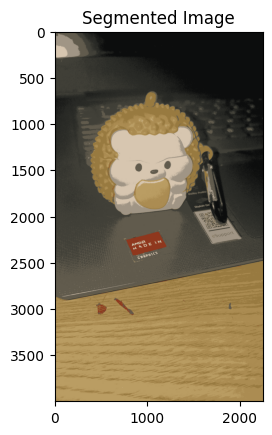

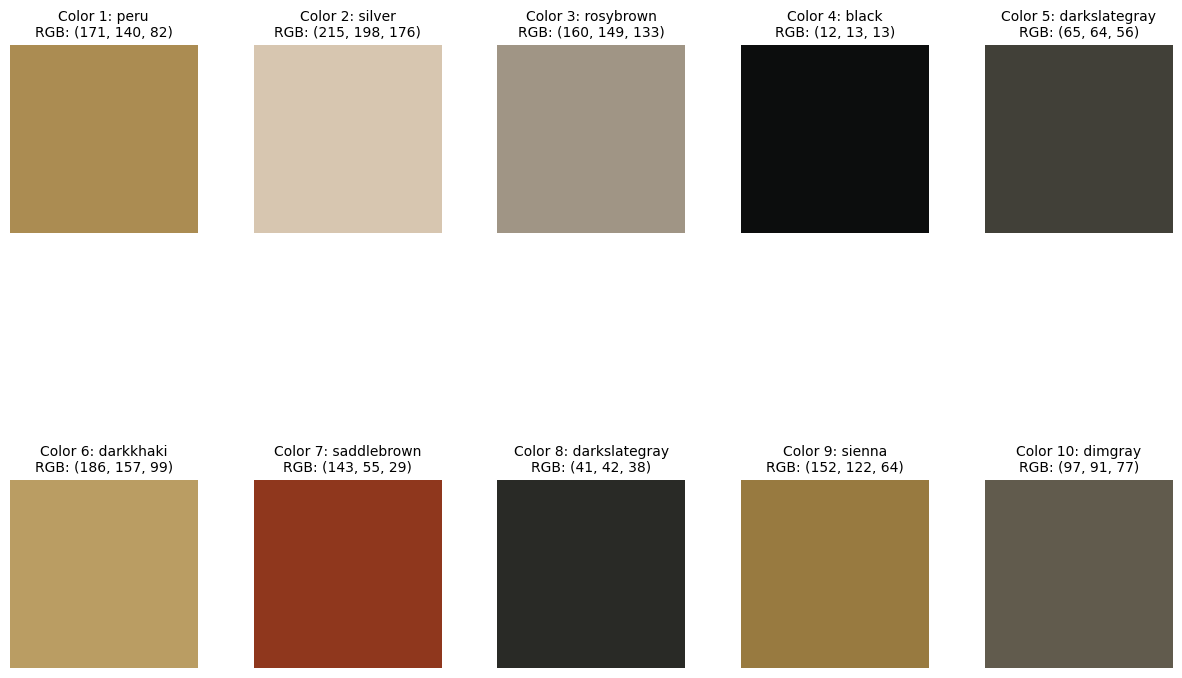

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import webcolors
import exifread

# Fungsi untuk mendapatkan nama warna terdekat
def closest_color(requested_color):
    min_colors = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_color[0]) ** 2
        gd = (g_c - requested_color[1]) ** 2
        bd = (b_c - requested_color[2]) ** 2
        min_colors[(rd + gd + bd)] = name
    return min_colors[min(min_colors.keys())]

# Fungsi untuk mencoba mendapatkan nama warna secara langsung, jika gagal, cari yang terdekat
def get_color_name(requested_color):
    try:
        closest_name = webcolors.rgb_to_name(requested_color)
    except ValueError:
        closest_name = closest_color(requested_color)
    return closest_name

# Membaca gambar dan metadata
image_path = 'IMG.jpg'
image = cv2.imread(image_path)

# Membaca metadata menggunakan exifread
with open(image_path, 'rb') as f:
    tags = exifread.process_file(f)

# Menampilkan metadata
print("Metadata:")
for tag, value in tags.items():
    print(f"{tag}: {value}")

# Mengubah warna ke RGB (dari BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('Gambar asli')
plt.show()

# Membentuk ulang gambar menjadi susunan piksel 2D dan 3 nilai warna (RGB)
pixel_vals = image.reshape((-1, 3))

# Mengonversikan ke tipe float
pixel_vals = np.float32(pixel_vals)

# Menentukan kriteria untuk k-means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# Menentukan jumlah cluster
k = 10  # Anda bisa mengubah nilai ini untuk mendeteksi lebih banyak warna
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Mengonversi data menjadi nilai 8-bit
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# Membentuk ulang data menjadi dimensi gambar asli
segmented_image = segmented_data.reshape((image.shape))
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.show()

# Menampilkan warna yang terdeteksi beserta nama warna
fig, ax = plt.subplots(2, (k + 1) // 2, figsize=(15, 10))  # 2 baris, k kolom
ax = ax.flatten()

for i, center in enumerate(centers):
    color_name = get_color_name(center)
    color_patch = np.zeros((100, 100, 3), dtype=np.uint8)
    color_patch[:, :] = center
    ax[i].imshow(color_patch)
    ax[i].set_title(f'Color {i+1}: {color_name}\nRGB: {tuple(center)}', fontsize=10)
    ax[i].axis('off')

# Menyembunyikan axis kosong jika jumlah warna kurang dari grid subplot
for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])

plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Menambah jarak antar subplot
plt.show()
